<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/M%C3%A9tricas_de_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [9]:
filename = '/content/drive/MyDrive/Coding Dojo /Codigo /week7/bank_modified.csv'
df = pd.read_csv(filename)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [11]:
df.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
y_yes                  0
dtype: int64

In [12]:
X = df.loc[:, df.columns[(df.columns != 'y_yes')]]
y = df.loc[:, 'y_yes'].values

In [13]:
y.shape

(4521,)

In [14]:
X.shape

(4521, 25)

In [35]:
from matplotlib import cm

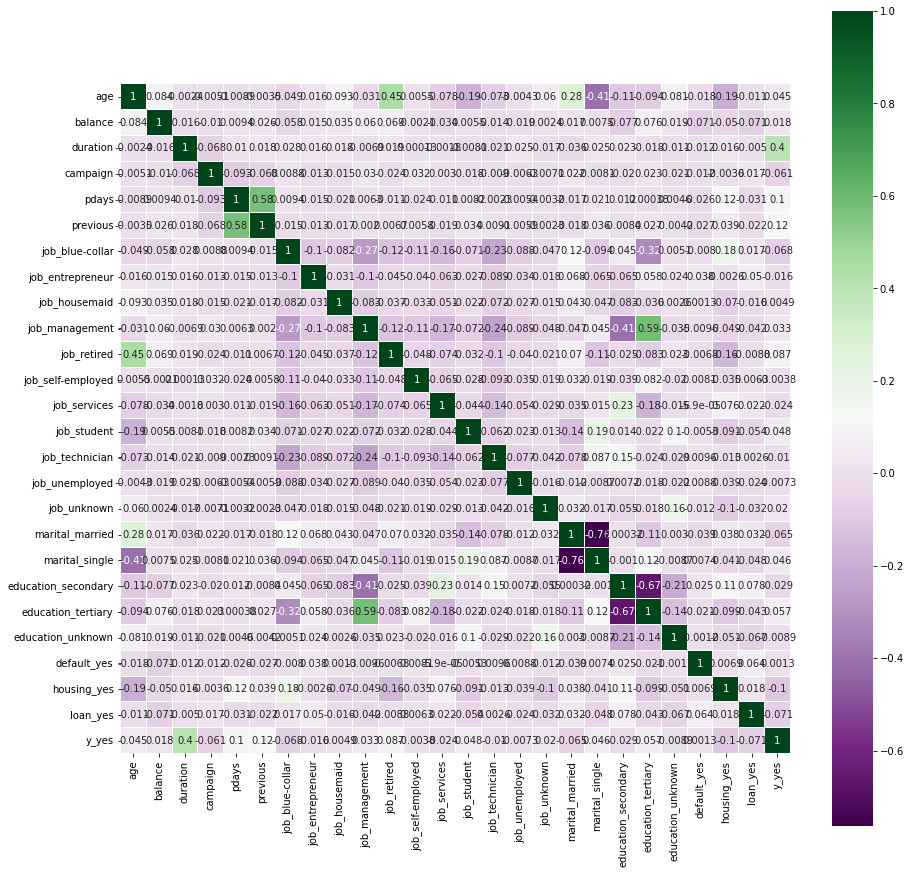

In [56]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,linewidths=0.1,vmax=1.0,square=True,cmap=cm.PRGn,linecolor='white',annot=True)

In [57]:
cols_drop = ['age','marital_married','job_blue-collar','campaign','housing_yes']

In [16]:
# Crea una instancia del modelo
logreg = LogisticRegression(C = 1000)
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# El modelo está aprendiendo la relación entre X e y
logreg.fit(X_train,y_train)

LogisticRegression(C=1000)

In [17]:
from sklearn.metrics import classification_report

In [18]:
Y_predict = logreg.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1004
           1       0.59      0.21      0.31       127

    accuracy                           0.89      1131
   macro avg       0.75      0.60      0.63      1131
weighted avg       0.87      0.89      0.87      1131



In [19]:
from sklearn.metrics import precision_score

In [20]:
precision = precision_score(y_test, Y_predict)
print(precision)

0.5869565217391305


In [21]:
from sklearn.metrics import recall_score

In [22]:
sensibilidad = recall_score(y_test, Y_predict)
print(sensibilidad)

0.2125984251968504


In [23]:
from sklearn.metrics import f1_score
puntaje = f1_score(y_test, Y_predict)
print(puntaje)

0.3121387283236995


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [25]:
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 0.8589244203777626
Testing AUC: 0.8762273739686922


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


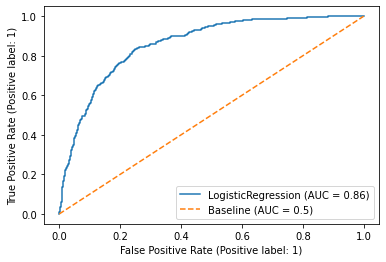

In [26]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

MODELO CON CARACTERISTICAS FILTRADAS

In [27]:
df.shape

(4521, 26)

In [58]:
df1 = df.drop(cols_drop,axis = 1 )

In [59]:
X1 = df1.loc[:, df1.columns[(df1.columns != 'y_yes')]]
y = df1.loc[:, 'y_yes'].values

In [60]:
# Crea una instancia del modelo
logreg = LogisticRegression(C = 1000)
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=3)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# El modelo está aprendiendo la relación entre X e y
logreg.fit(X_train,y_train)

LogisticRegression(C=1000)

In [61]:
Y_predict = logreg.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1004
           1       0.60      0.21      0.31       127

    accuracy                           0.90      1131
   macro avg       0.75      0.60      0.63      1131
weighted avg       0.87      0.90      0.87      1131



In [62]:
precision = precision_score(y_test, Y_predict)
print(precision)

0.6


In [63]:
sensibilidad = recall_score(y_test, Y_predict)
print(sensibilidad)

0.2125984251968504


In [64]:
from sklearn.metrics import f1_score
puntaje = f1_score(y_test, Y_predict)
print(puntaje)

0.3139534883720931


In [65]:
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 0.8393767832575414
Testing AUC: 0.8597499764720644


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


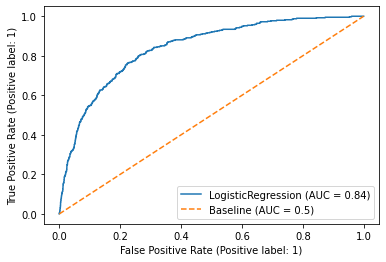

In [66]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico. ¿Qué métrica va a ayudar más al banco?


mas metricas que favorecen mas al modelo son:

pdays 
previous
job_retired
education_tertiary


Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?

no veo diferecnia 

¿De qué otras formas podrías mejorar este modelo?

Supriminedo Caracateristicas que no las voy a utilizar 